<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/chapter_7_Example_7_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 8.1 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, ss, ss2tf, forced_response, pzmap, tfdata, feedback, TransferFunction
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#from sympy import symbols, Matrix, eye, Inverse

G=  
   100
----------
s^2 + 10 s

H =  
  1
-----
s + 5

Geq(s)=  
       100 s + 500
-------------------------
s^3 + 15 s^2 - 50 s - 400

T(s)=  
       100 s + 500
-------------------------
s^3 + 15 s^2 + 50 s + 100



(array([-11.3780008+0.j        ,  -1.8109996+2.34716226j,
         -1.8109996-2.34716226j]),
 array([-5.+0.j]))

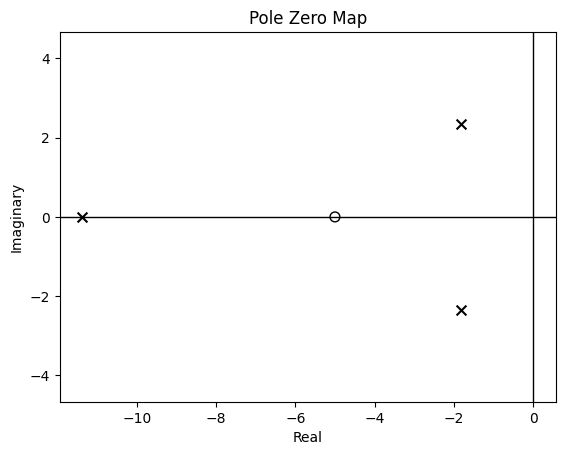

In [6]:
# Define your OPEN loop TF:
G = tf(100, [1, 10, 0])
print("G= ", G)
# feedback transfer function
H = tf(1, [1,5])
print("H = ", H)
# equivelent open loop TF for a unity feedback
Geq = feedback(G, H-1)
print("Geq(s)= ", Geq)

# closed loop TF for stability test
T = feedback(G, H)
print("T(s)= ", T)

pzmap(T)

In [12]:
# find steady state error
kp = Geq.dcgain()
print("kp = ", kp)
ess = 1/(1+kp)
print("ess = ", ess)

kp =  -1.25
ess =  -4.0


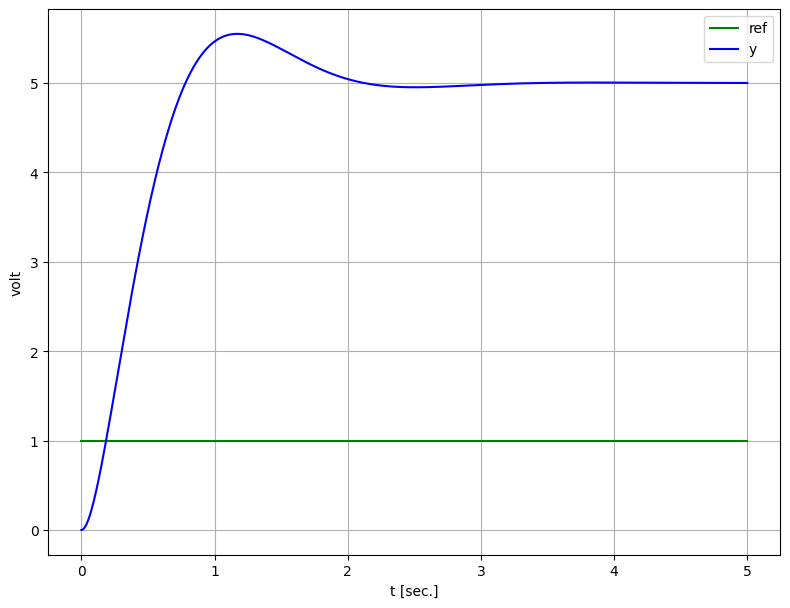

In [13]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 5
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)
r = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(T, T=t, U=r, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "ref", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")